## Pre Processing Steps

1. Read the data
2. Describe both numeric and categorical variables
3. Choose variable of interest
4. Missing value treatment
5. Correlation check
6. VIF check
7. Outlier treatment
8. If regression then check linearity option
9. Scaling the data
10. Declare the inputs and the targets

In [1]:
# Bu praktik nümunə üçün bizə aşağıdakı kitabxanalar və modullar lazımdır
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('real_life_example.csv')

In [3]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [4]:
# Təsviri statistika dəyişənlərin ilkin tədqiqi üçün çox faydalıdır
# Varsayılan olaraq, yalnız ədədi dəyişənlər üçün təsvirlər göstərilir
# Kateqorik olanları daxil etmək üçün bunu arqumentlə qeyd etməlisiniz


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:

# 'Model' olmadan təsviri yoxlayaq


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [6]:
# data.isnull() # verilənlər nöqtəsinin boş olub-olmaması barədə məlumatı olan df göstərir
# True = məlumat nöqtəsi əskik olduğu halda, False = məlumat nöqtəsi əskik olmadığı üçün onları cəmləyə bilərik
# Bu, xüsusiyyət baxımından bizə çatışmayan dəyərlərin ümumi sayını verəcəkdir


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Define correlated variables

<AxesSubplot:>

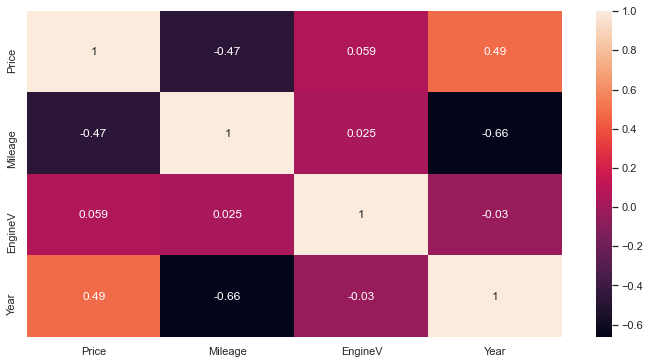

,Price
Price,1.000000
Mileage,-0.473523
EngineV,0.058664
Year,0.485734


C:\Users\002791\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

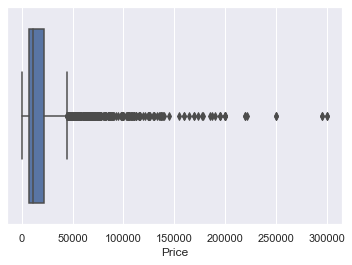

C:\Users\002791\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

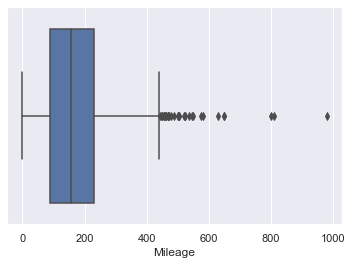

C:\Users\002791\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year'>

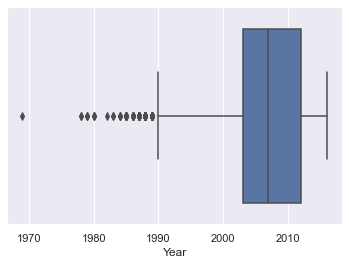

In [16]:
#Upper['Price'] gostericileri

36801.0

### Dealing with outliers

<ipython-input-17-4852553cb120>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv['Price'] = np.where(data_no_mv['Price']>Upper['Price'],Upper['Price'],data_no_mv['Price'])


In [18]:
Upper['Mileage']

370.0

<ipython-input-19-34432a7a951a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv['Mileage'] = np.where(data_no_mv['Mileage']>Upper['Mileage'],Upper['Mileage'],data_no_mv['Mileage'])


In [20]:
Lower['Year']

1994.0

<ipython-input-21-ae4653eafc07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv['Year'] = np.where(data_no_mv['Year']<Lower['Year'],Lower['Year'],data_no_mv['Year'])


C:\Users\002791\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

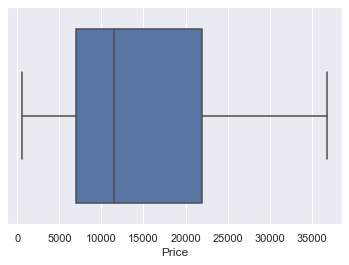

C:\Users\002791\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

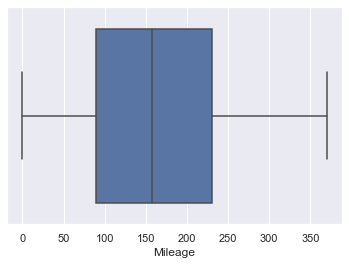

C:\Users\002791\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year'>

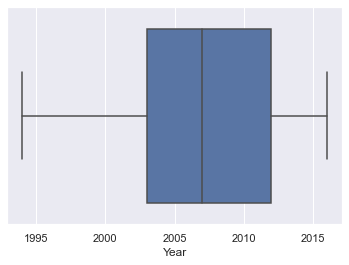

In [25]:
# 2 və 3 indeksləri olan müşahidələri silsək, indekslər 0,1,4,5,6 kimi gedəcək.
# Bu, çox problemlidir, çünki biz bunu unutmağa meyl edirik (sonra belə bir problemin nümunəsini görəcəksiniz)

# Nəhayət, indeksi sıfırladıqdan sonra köhnə indeksdən ibarət yeni sütun yaradılacaq (hər halda)
# Buna ehtiyacımız olmayacaq, beləliklə, onu tamamilə unutmaq üçün 'drop=True' düyməsini basın

In [26]:
data_cleaned = data_no_mv.reset_index(drop = True)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,15296.085195,NaN,161.470062,2.764586,NaN,NaN,2006.632547
std,NaN,11074.707489,NaN,97.129779,4.935941,NaN,NaN,6.048666
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1994.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [28]:
# np.log(x) ədədin və ya ədədlər massivinin natural loqarifmini qaytarır
# Günlük çevrilmə ilə 'Qiymət'i çevirək


# Then we add it to our data frame


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277.0,2.0,Petrol,yes,1994.0,8.342840
1,Mercedes-Benz,7900.0,van,370.0,2.9,Diesel,yes,1999.0,8.974618
2,Mercedes-Benz,13300.0,sedan,358.0,5.0,Gas,yes,2003.0,9.495519
3,Audi,23000.0,crossover,240.0,4.2,Petrol,yes,2007.0,10.043249
4,Toyota,18300.0,crossover,120.0,2.0,Petrol,yes,2011.0,9.814656
...,...,...,...,...,...,...,...,...,...
4020,Toyota,17900.0,sedan,35.0,1.6,Petrol,yes,2014.0,9.792556
4021,Mercedes-Benz,36801.0,sedan,9.0,3.0,Diesel,yes,2014.0,10.513280
4022,BMW,6500.0,sedan,1.0,3.5,Petrol,yes,1999.0,8.779557
4023,BMW,8000.0,sedan,194.0,2.0,Petrol,yes,1994.0,8.987197


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277.0,2.0,Petrol,yes,1994.0,8.342840
1,Mercedes-Benz,7900.0,van,370.0,2.9,Diesel,yes,1999.0,8.974618
2,Mercedes-Benz,13300.0,sedan,358.0,5.0,Gas,yes,2003.0,9.495519
3,Audi,23000.0,crossover,240.0,4.2,Petrol,yes,2007.0,10.043249
4,Toyota,18300.0,crossover,120.0,2.0,Petrol,yes,2011.0,9.814656
...,...,...,...,...,...,...,...,...,...
4020,Toyota,17900.0,sedan,35.0,1.6,Petrol,yes,2014.0,9.792556
4021,Mercedes-Benz,36801.0,sedan,9.0,3.0,Diesel,yes,2014.0,10.513280
4022,BMW,6500.0,sedan,1.0,3.5,Petrol,yes,1999.0,8.779557
4023,BMW,8000.0,sedan,194.0,2.0,Petrol,yes,1994.0,8.987197


In [31]:
# Məlumat çərçivəmizin sütunlarına tez baxaq


Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'log_price'],
      dtype='object')

Brand            object
Body             object
Mileage         float64
EngineV         float64
Engine Type      object
Registration     object
Year            float64
log_price       float64
dtype: object

In [33]:
# EngineV sutunun silin ve sebebini izah edin


In [34]:
#ilk 5 row daxil edin


,Brand,Body,Mileage,Engine Type,Registration,Year,log_price
0,BMW,sedan,277.0,Petrol,yes,1994.0,8.342840
1,Mercedes-Benz,van,370.0,Diesel,yes,1999.0,8.974618
2,Mercedes-Benz,sedan,358.0,Gas,yes,2003.0,9.495519
3,Audi,crossover,240.0,Petrol,yes,2007.0,10.043249
4,Toyota,crossover,120.0,Petrol,yes,2011.0,9.814656


In [35]:
#ancaq object olan sutunlari secin


,Brand,Body,Engine Type,Registration
0,BMW,sedan,Petrol,yes
1,Mercedes-Benz,van,Diesel,yes
2,Mercedes-Benz,sedan,Gas,yes
3,Audi,crossover,Petrol,yes
4,Toyota,crossover,Petrol,yes
...,...,...,...,...
4020,Toyota,sedan,Petrol,yes
4021,Mercedes-Benz,sedan,Diesel,yes
4022,BMW,sedan,Petrol,yes
4023,BMW,sedan,Petrol,yes


In [36]:
# value countlari gosterin 


Volkswagen       880
Mercedes-Benz    823
BMW              640
Toyota           510
Renault          445
Audi             420
Mitsubishi       307
Name: Brand, dtype: int64

In [37]:
# value countlari gosterin


sedan        1534
crossover     824
van           626
other         394
vagon         379
hatch         268
Name: Body, dtype: int64

In [38]:
# value countlari gosterin


Diesel    1861
Petrol    1468
Gas        590
Other      106
Name: Engine Type, dtype: int64

In [39]:
# value countlari gosterin


yes    3654
no      371
Name: Registration, dtype: int64

## Create dummy variables

In [40]:
data_no_multicollinearity.Registration=data_no_multicollinearity.Registration.map({'yes': 0,'no':1})
# or
# data_no_multicollinearity['Registration'] = data_no_multicollinearity['Registration'].map({'yes': 0, 'no': 1})

In [41]:
# ilk 5 row gosterin

,Brand,Body,Mileage,Engine Type,Registration,Year,log_price
0,BMW,sedan,277.0,Petrol,0,1994.0,8.342840
1,Mercedes-Benz,van,370.0,Diesel,0,1999.0,8.974618
2,Mercedes-Benz,sedan,358.0,Gas,0,2003.0,9.495519
3,Audi,crossover,240.0,Petrol,0,2007.0,10.043249
4,Toyota,crossover,120.0,Petrol,0,2011.0,9.814656


In [42]:
#categorikleri numerike cevirin


In [43]:
# ilk 5 row gosterin

,Mileage,Registration,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277.0,0,1994.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,370.0,0,1999.0,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,358.0,0,2003.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,240.0,0,2007.0,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,120.0,0,2011.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Rearrange a bit

In [44]:
#columnslari gosterin


array(['Mileage', 'Registration', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol'], dtype=object)

In [45]:
cols = ['log_price', 'Mileage', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration']

In [46]:
# Yenidən sıralamağı həyata keçirmək üçün köhnəsinə bərabər olan, lakin yeni xüsusiyyətlər sırasına malik yeni df yaradacağıq.


,log_price,Mileage,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration
0,8.342840,277.0,1994.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,8.974618,370.0,1999.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,9.495519,358.0,2003.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
3,10.043249,240.0,2007.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,9.814656,120.0,2011.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [47]:
#il uzre value count verin


2008.0    393
2012.0    336
2007.0    334
2011.0    302
2013.0    243
1994.0    237
2016.0    209
2006.0    200
2005.0    176
2010.0    168
2004.0    156
2003.0    151
2014.0    147
2000.0    142
2001.0    133
2009.0    127
2002.0    125
1999.0    103
2015.0     87
1998.0     75
1997.0     74
1996.0     63
1995.0     44
Name: Year, dtype: int64

In [48]:
example = data_preprocessed.copy()

In [49]:
#iller uzre qruplasdirin pd.cut istifade ederek


In [50]:
example['year_cut'].value_counts()

(2010.0, 2016.0]    1324
(2005.0, 2010.0]    1222
(2000.0, 2005.0]     883
(1994.0, 2000.0]     596
Name: year_cut, dtype: int64

In [51]:
ranges = [1993, 2000, 2005, 2010, 2017]  # np.inf for infinity
labels_added = ['Q1', 'Q2', 'Q3', 'Q4']
#illeri qeyd olunan herfler uzre tamamlayin pd.cut dan istifade ederek

,log_price,Mileage,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration,year_cut,Year_labelled
0,8.342840,277.0,1994.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,"(1994.0, 2000.0]",Q1
1,8.974618,370.0,1999.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,"(1994.0, 2000.0]",Q1
2,9.495519,358.0,2003.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,"(2000.0, 2005.0]",Q2
3,10.043249,240.0,2007.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"(2005.0, 2010.0]",Q3
4,9.814656,120.0,2011.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,"(2010.0, 2016.0]",Q4
5,10.513280,0.0,2016.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,"(2010.0, 2016.0]",Q4
6,8.716044,370.0,1997.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,"(1994.0, 2000.0]",Q1
7,9.560997,200.0,2006.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"(2005.0, 2010.0]",Q3
8,9.287209,193.0,2012.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,"(2010.0, 2016.0]",Q4
9,7.244228,212.0,1999.0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,"(1994.0, 2000.0]",Q1


In [52]:
example['Year_labelled'].value_counts()

Q4    1324
Q3    1222
Q2     741
Q1     738
Name: Year_labelled, dtype: int64

## Linear regression model

### Declare the inputs and the targets

In [56]:
# The target(s) (dependent variable) is 'log price'-Hədəf(lər) (asılı dəyişən) "log qiymətidirin"


# musteqeil deyisenleri mueyyen edin


Index(['Mileage', 'Year', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration'],
      dtype='object')

In [57]:
# Many machine learning algorithms perform better when numerical input variables are scaled to a standard range.

# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object

# Fit the inputs 


StandardScaler()

In [58]:
# Scale the features and store them in a new variable (the actual scaling procedure)


array([[ 1.18958669, -2.08874406,  2.29979619, ..., -0.1644619 ,
         1.31978241, -0.31864175],
       [ 2.14718749, -1.26201287, -0.43482114, ..., -0.1644619 ,
        -0.75770066, -0.31864175],
       [ 2.0236261 , -0.60062791, -0.43482114, ..., -0.1644619 ,
        -0.75770066, -0.31864175],
       ...,
       [-1.65232539, -1.26201287,  2.29979619, ..., -0.1644619 ,
         1.31978241, -0.31864175],
       [ 0.33495371, -2.08874406,  2.29979619, ..., -0.1644619 ,
         1.31978241, -0.31864175],
       [-0.38582109,  1.05283447, -0.43482114, ..., -0.1644619 ,
        -0.75770066, -0.31864175]])

In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [60]:
# Create a linear regression object

# Fit the regression with the scaled TRAIN inputs and targets


LinearRegression()

In [61]:
# Obtain the bias (intercept) of the regression


9.342297755221932

In [62]:
# Obtain the weights (coefficients) of the regression




array([-0.01271275,  0.53871987,  0.02499732,  0.01029681, -0.14269885,
       -0.2334314 , -0.06552222, -0.13973168, -0.14778893, -0.08718677,
       -0.19120347, -0.12665551, -0.18817505, -0.00481386, -0.01001942,
       -0.00903321, -0.2431634 ])

In [63]:
#predict deyerimizi teyin edin


,actual,prediction
150,10.257659,10.246989
3732,9.093807,9.498300
3511,8.787220,8.725427
307,8.985946,8.911432
2503,9.323669,9.308107
...,...,...
3722,10.513280,10.802632
2445,10.513280,10.373261
1196,9.345745,9.522661
2506,8.006368,8.067601


In [65]:
#Erroru teyin edin

In [66]:
#MAPE tapin daha sonra modelin accuracy teyin edin

Accuracy: 97.4 %.
